In [3]:
# Basisbibliotheken für Datenanalyse 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Laden des vorbereiteten MRT-Datensatzes
df = pd.read_pickle("P7_mri_normalized_data.pkl")

In [6]:
#Anzeige der ersten fünf  Zeilen des DataFrames
# Dient zuir ersten  Übersicht  über Struktur und Inhalt  der Daten
df.head()

,Image_ID,Target_Class,Normalized_Image
0,bcad40b3-d78c-46d2-b2db-fe890c58a718.jpg,NonDemented,"[[0.08627451, 0.08627451, 0.08627451, 0.086274..."
1,9fd92f16-c864-4852-954a-19e9dcd13ccb.jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2f4e34b0-c7d5-482b-a173-cf58b75337ee.jpg,NonDemented,"[[0.03529412, 0.03529412, 0.03529412, 0.035294..."
3,27 (32).jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,nonDem1867.jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [7]:
# Liefert Imformationen über:
# Anzahl der Einträgen
# Datentypen der Spalten
# Vorhandensein fehlender Werte
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Image_ID          400 non-null    object
 1   Target_Class      400 non-null    object
 2   Normalized_Image  400 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [8]:
# Gibt die Dimensions des DataFrames zurück:
# (Anzahl der Zeilen = Bilder, Anzahl der Spalten, = Merkmale)
df.shape

(400, 3)

In [9]:
#Zählt die Anzahl der Bilder pro Klasse
#Wichtig zur Überprüfung  der Klassenverteilung
df["Target_Class"].value_counts()

Target_Class
NonDemented         100
VeryMildDemented    100
MildDemented        100
ModerateDemented    100
Name: count, dtype: int64

In [10]:
# Gibt die relative Häufigkeit  der Klassen zurück
# Zeigt, dass der Datensatz  balanciert 
df["Target_Class"].value_counts(normalize = True)

Target_Class
NonDemented         0.25
VeryMildDemented    0.25
MildDemented        0.25
ModerateDemented    0.25
Name: proportion, dtype: float64

In [11]:
# Zeigt, die Anzahl von Nullen , man muss immer prüfen , ob die Werte fehlen
df.isnull().sum()

Image_ID            0
Target_Class        0
Normalized_Image    0
dtype: int64

In [12]:
#Überprüfung des Datentyps eines einzelnen Bildes
type(df.loc[0, "Normalized_Image"]).shape


<attribute 'shape' of 'numpy.ndarray' objects>

In [13]:
# Abfrage der Dimesionen eines einzelnen MRT-Bildes
(df.loc[0, "Normalized_Image"]).shape

(190, 200)

In [14]:
# Jetzt muss man min und max  des Pixelwertes bestimmen 
df.loc[0, "Normalized_Image"].min(), df.loc[0, "Normalized_Image"].max()

(np.float32(0.06666667), np.float32(0.9254902))

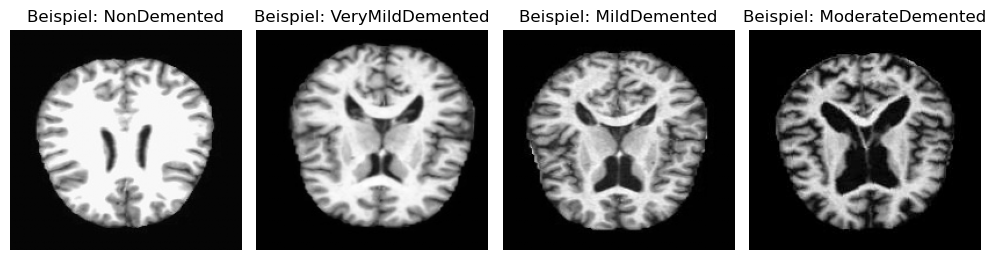

In [66]:
# wir de finieren die Klassen, die wir  visuell vergleichen wollen
classes = ["NonDemented",
          "VeryMildDemented",
          "MildDemented",
          "ModerateDemented"]
# Wir erstellen eine Figure, breit genug für 4 Bilder nebeneinander
plt.figure(figsize=(10,4))

# eunumerate(classes) liefert (Index i, KlassenName cls)
for i, cls in enumerate(classes):
    #wir filtern den DataFrame auf die aktuelle Klasse(Ground Truth)
    # Danach nehmen wir das erste gefundene Bild als Beispiel (.iloc[0])
    
    img = df[df["Target_Class"] == cls].iloc[0]["Normalized_Image"]
    # wir erstellen ein Subplot 1 Zeile, 4 Spalten , Postion i+1
    plt.subplot(1,4, i + 1)
    # Bild wird Graustufen angezeigt
    plt.imshow(img, cmap= "gray")
    # es wird gezeigt, welche Klasse gerade dargestellt wird
    plt.title(f"Beispiel: {cls}")
    # Achsen entfern, damit die Darstellung sauber ist (Keine Pixel-Achsen)
    plt.axis("off")
# Layout automatisch optimieren (weniger Überlappung)
plt.tight_layout()
# Figure anzeigen
plt.show()


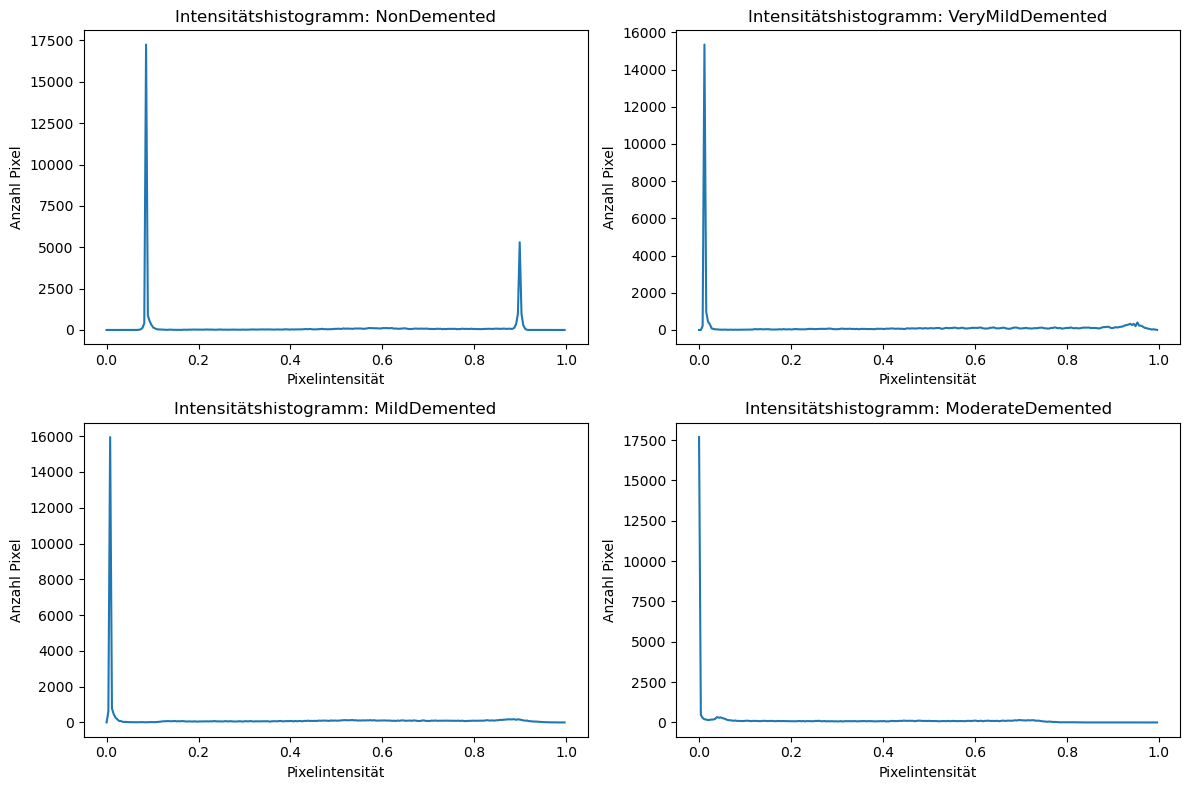

In [75]:
# Klassen definieren, für die wir Intensitätshistogramme anzeigen wollen
classes = ["NonDemented",
          "VeryMildDemented",
          "MildDemented",
          "ModerateDemented"
    ]
# Figure mit 4 Subplots (2 mal 2)
plt.figure(figsize=(12,8))

for idx, cls in enumerate(classes):
    # Esrtes Bild der jeweiligen Klasse auswählen.
    img = df[df["Target_Class"] == cls].iloc[0]["Normalized_Image"]
    # Bild in 1D-Pixelvektor umwandeln
    pixels = img.ravel()
    # Histogramm berechnen 
    counts, bin_edges = np.histogram(pixels, bins=256, range=(0,1))

    # Subplot
    plt.subplot(2, 2, idx + 1)
    plt.plot(bin_edges[:-1], counts)
    plt.title(f"Intensitätshistogramm: {cls}")
    plt.xlabel("Pixelintensität")
    plt.ylabel("Anzahl Pixel")

 # Layout optimieren und anzeigen 
plt.tight_layout()
plt.show()

In [17]:

mean_intensity = pixels.mean()
mean_intensity

np.float32(0.39568537)

In [18]:
variance_intensity = pixels.var()
variance_intensity

np.float32(0.12375688)

In [20]:
# wir importieren skew (Schiefe) aus scipy.stats
# Schiefe zeigt, ob die Verteilung eher links/rechts  gezogen ist.
from scipy.stats import skew, kurtosis
skewness_intensity = skew(pixels)
skewness_intensity

np.float64(0.4334676265716553)

In [24]:
# Es wird leere Listen für die späteren Feauture-Werte
mittel_list = []
var_list = []
skew_list = []
# Wir iterieren über jedes Bild im DataFrame
for img in df["Normalized_Image"]:
    # Bild in 1D-Pixelvektor umwandeln
    pixels = img.ravel()
    # Mittelwert der Intensität: durchschnittliche Helligkeit
    mittel_list.append(pixels.mean())
    #Varianz der Intensität, Strueung und Kontrastinformation
    var_list.append(pixels.var())
    #Asymmetrie der Intensitätsverteilung
    skew_list.append(skew(pixels))

In [25]:
# Jetzt  müssen wir dann die berechneten Features als neue Spalten Im DataFrame speichern
df["Mean_Intensity"] = mittel_list
df["Variance_Intensity"] = var_list
df["Skewness_Intensity"] = skew_list
# Kuzer Check: Ersten Zeilen anzeigen.
df.head()

,Image_ID,Target_Class,Normalized_Image,Mean_Intensity,Variance_Intensity,Skewness_Intensity
0,bcad40b3-d78c-46d2-b2db-fe890c58a718.jpg,NonDemented,"[[0.08627451, 0.08627451, 0.08627451, 0.086274...",0.395685,0.123757,0.433468
1,9fd92f16-c864-4852-954a-19e9dcd13ccb.jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.301677,0.104330,0.594333
2,2f4e34b0-c7d5-482b-a173-cf58b75337ee.jpg,NonDemented,"[[0.03529412, 0.03529412, 0.03529412, 0.035294...",0.276617,0.071514,0.523584
3,27 (32).jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.321936,0.135778,0.495176
4,nonDem1867.jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.334758,0.134980,0.420954


In [26]:
df.columns

Index(['Image_ID', 'Target_Class', 'Normalized_Image', 'Mean_Intensity',
       'Variance_Intensity', 'Skewness_Intensity'],
      dtype='object')

In [27]:
df.head()

,Image_ID,Target_Class,Normalized_Image,Mean_Intensity,Variance_Intensity,Skewness_Intensity
0,bcad40b3-d78c-46d2-b2db-fe890c58a718.jpg,NonDemented,"[[0.08627451, 0.08627451, 0.08627451, 0.086274...",0.395685,0.123757,0.433468
1,9fd92f16-c864-4852-954a-19e9dcd13ccb.jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.301677,0.104330,0.594333
2,2f4e34b0-c7d5-482b-a173-cf58b75337ee.jpg,NonDemented,"[[0.03529412, 0.03529412, 0.03529412, 0.035294...",0.276617,0.071514,0.523584
3,27 (32).jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.321936,0.135778,0.495176
4,nonDem1867.jpg,NonDemented,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.334758,0.134980,0.420954


In [28]:
df["Target_Binary"] = (df["Target_Class"] != "NonDemented").astype(int)
df["Target_Binary"].value_counts()

Target_Binary
1    300
0    100
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

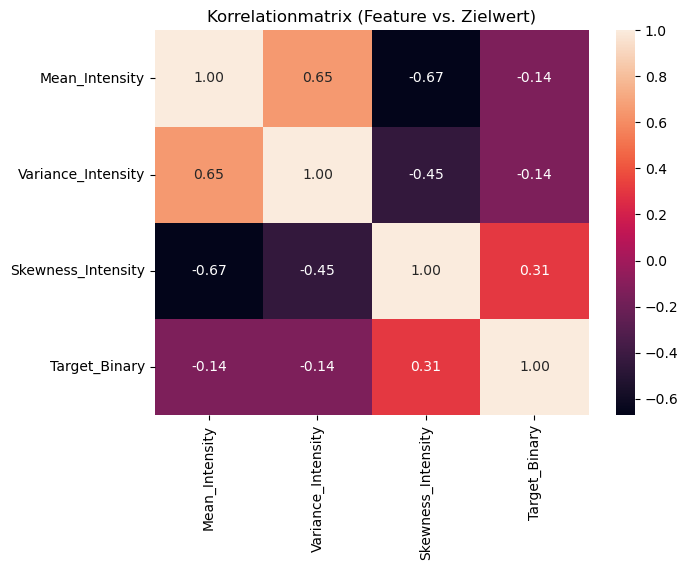

In [29]:
# Wir definieren die Spalten , die wir für die Korrelation verwenden
korrelation_cols = ["Mean_Intensity", "Variance_Intensity", "Skewness_Intensity", "Target_Binary"]
# wir berechnen die Pearson-Korrelation (linearer Zusammenhang)
corr = df[korrelation_cols].corr(method= "pearson")
# Figure für Heatmap
plt.figure(figsize=(7,5))
# Heatmap: annot=True zeigt die Zahlwerte in der Matrix
# fmt=".2f" rundet auf 2 Nachkommastellen
sns.heatmap(corr, annot=True, fmt=".2f")
# Titel der Grafik
plt.title("Korrelationmatrix (Feature vs. Zielwert)")
# Anzeigen
plt.show

In [31]:

# Wir filtern den DataFrame df auf die Klasse NonDemented
# .iloc[0] nimmt das erste Bild dieser Klasse
# [Normalized_image] enthält das Beispielbild pro Klasse und vergleichen die Pixelverteilung (Histogramm)
img_non = df[df["Target_Class"] == "NonDemented"].iloc[0]["Normalized_Image"]
# Gleiche Logik, aber jetzt für die Klasse MildDemented
#Wir nehmen wieder das erste Bild als repräsentives Beispiel
img_mod = df[df["Target_Class"] == "MildDemented"].iloc[0]["Normalized_Image"]

#ravel macht aus dem 2D-Bild (z.B. 190 * 200) einen 1D-Vektor
px_non = img_non.ravel()
px_mod = img_mod.ravel()

In [32]:
#mean() berechnet den Mittelwert der Pixelintensitäten (Helligkeit im Durchschnitt)
# var() berechnet die Varianz(wie stark die Pixelwerte streuen / Kontrast/ Heterogenität)
mean_non, var_non = px_non.mean(), px_non.var()
# Mittelwert und Varianz für die MildDemented-Klasse berechnen
mean_mod, var_mod = px_mod.mean(), px_mod.var()
# wir geben  die Werte direkt aus, um  sie zu vergleichen und später in der Doku zu nutzen
mean_non, var_non, mean_mod, var_mod

(np.float32(0.39568537),
 np.float32(0.12375688),
 np.float32(0.29932186),
 np.float32(0.10878609))

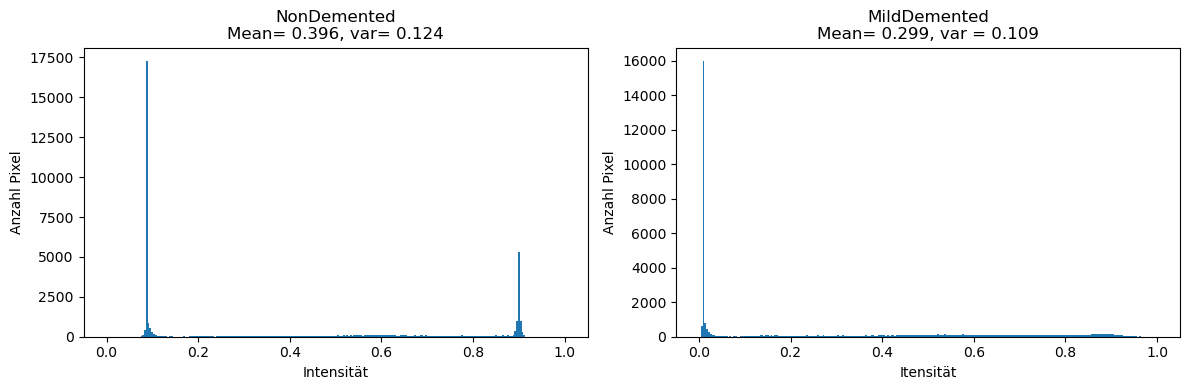

In [67]:
#Neue Figur erstellen: breit,  damit Histogramme nebeneinander gut sichtbar sind
plt.figure(figsize=(12, 4))
#Es wird ein Layout mit 1 Zeile  und 2 Spalten erstellt
#subplot(1,2,1) bedeutet erstes Feld links
plt.subplot(1, 2, 1)
# Histrogramm der Pixelwerte für NonDemented
# bins=256: 256 Intensitäts-Bins  passt gut zu Grauwert-Auflösung
# range= 0,1 weil unsere Daten normalisiert sind
plt.hist(px_non, bins=256, range=(0, 1))
#Klasse + Mittelwert und Varianz (auf 3 Nachkommastellen gerundet) 
plt.title(f"NonDemented\nMean= {mean_non:.3f}, var= {var_non:.3f}")
# Es wird Pixelintensität 0 = Schwarz und 1 = Weiß gezeigt
plt.xlabel("Intensität")
# Es wird gezeigt, wie viele Pixel in jedes Intensitätsintervall fallen
plt.ylabel("Anzahl Pixel")

# Zweites Feld im Layout rechts
plt.subplot(1, 2, 2)
#Histogramm der Pixelwerte für MildDemented
plt.hist(px_mod, bins=256, range=(0, 1))
# MildDemented + Mittelwert und Varianz für direkten Vergleich
plt.title(f"MildDemented\nMean= {mean_mod:.3f}, var = {var_mod:.3f}")
# Intensität 0 bis 1
plt.xlabel("Itensität")
# Anzahl der Pixel 
plt.ylabel("Anzahl Pixel")
# es wird dafür gesorgt, dass sich die Plots nicht überlappen
plt.tight_layout()
# zeigt die finale Grafik an
plt.show()



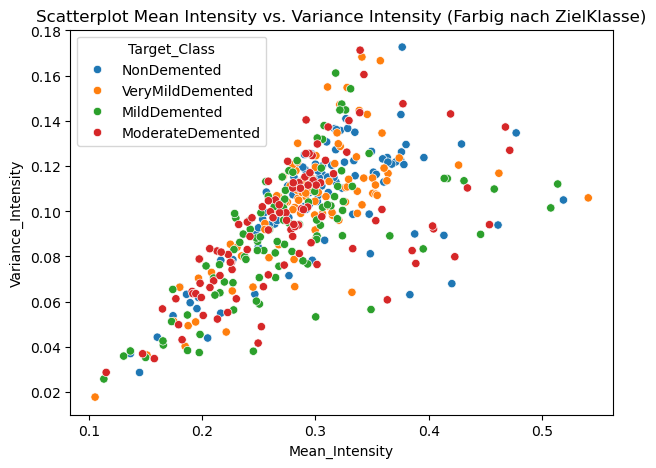

In [36]:
#Es wird die Abbildung mit einer festen Größe erstellt
plt.figure(figsize=(7, 5))
# Es wird einen Scatterplot erstellt
# Jeder Punkt entspricht einem MRT-Bild
# die X-Achse zeigt den mittleren Intensitätswert des Bildes
#  die y-Achse zeigt die Varianz der Intensität
# hue färbt die Punkte nach der Zielklasse
sns.scatterplot(data=df, x="Mean_Intensity", y="Variance_Intensity", hue = "Target_Class")
plt.title("Scatterplot Mean Intensity vs. Variance Intensity (Farbig nach ZielKlasse)")
plt.show()

In [37]:
#Es wird eine binäre ZielVariable erstellt
# NonDemented wird zu 1, alle anderen zu 0
df["Target_Binary"] =(df["Target_Class"] == "NonDemented").astype(int)

In [38]:
# definiert die Eingabefeautures für das Modell
# Es werden nur statistische Merkmale verwendet, keine Rohbilder
X = df[["Mean_Intensity", "Variance_Intensity", "Skewness_Intensity"]]
# Es wird die Zielvariable für das Modell definiert.
# Das wird lernen, ob ein Bild NonDemented(1) oder Demented (0) ist
y = df["Target_Binary"]

ROC-AUC (Testset): 0.668


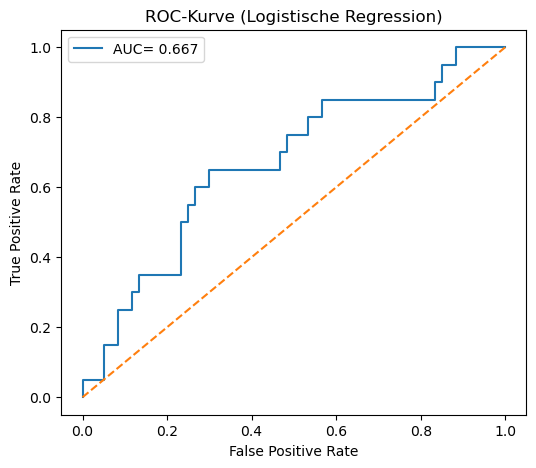

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# es wird die Daten in Training (80%) und test (20%)
# stratify sorgt dafür, dass beide Klassen gleich verteilt bleiben 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# es wird eine Pipeline, StandardScaler bringt alle Features auf gleiche Skala
# Logische Regression ist Klassifikationmodell

model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Es wird das Modell mit dem Trainingsdaten, das Modell lernt statistische Unterschiede zwischen den Klassen
model.fit(X_train, y_train)
# Gibt wahrscheinlichkeiten aus
y_proba = model.predict_proba(X_test)[:, 1]
# Berechnet die Area Under the Curve. Auc misst, wie gut das Modell zwiachen den Klassen unterscheidet
auc = roc_auc_score(y_test, y_proba)
# gib den AUC-Wert aus
print(f"ROC-AUC (Testset):", round(auc, 3))

import matplotlib.pyplot as plt
# Berechnet FPR TPR
fpr,tpr, thresholds = roc_curve(y_test, y_proba)
# Neue Abbildung
plt.figure(figsize=(6,5))
# Zeichnet die ROC-Kurve des Modells, die Kurve zeigt Leistung über alle Schwellenwerte
plt.plot(fpr, tpr, label=f"AUC= {auc:.3f}")
# Referenzlinie für Zufallsklassifikation, ein gutes Modell liegt über dieser Linie
plt.plot([0,1], [0,1], linestyle= "--")
# Beschriftet und zeigt die Grafik
plt.title("ROC-Kurve (Logistische Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [41]:
#Das Modell macht eine Vorhersage für die Testdaten
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Es wird die Confusion Matrix erstellt , y_test echte Klassen (Grouth Truth). y_pred Vorhersage des Modells
cm = confusion_matrix(y_test, y_pred)
# Ergebnis ist eine 2 mal 2 Matrix 
cm

array([[57,  3],
       [19,  1]])

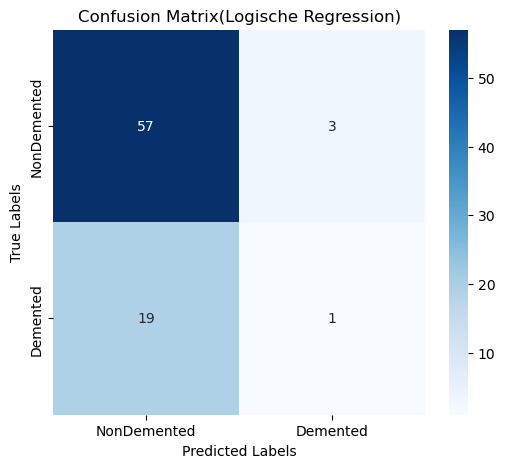

In [43]:
# es wird eine neue Grafik mit definierten Größe erstellt
plt.figure(figsize=(6, 5))
# annot = true zahlen werden angezeigt, fmt=d Ganzzahlen, cmap= Blues ist Farbskala, X-Achse vorhergesagte Klassen y-Achse Wahre Klassen
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["NonDemented", "Demented"], yticklabels= ["NonDemented", "Demented"])
plt.title("Confusion Matrix(Logische Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [44]:
from sklearn.metrics import classification_report
# Es wird einen detaillierten Bericht ausgegeben 
print(classification_report(y_test, y_pred, target_names=["NonDemented", "Demented"]))

              precision    recall  f1-score   support

 NonDemented       0.75      0.95      0.84        60
    Demented       0.25      0.05      0.08        20

    accuracy                           0.72        80
   macro avg       0.50      0.50      0.46        80
weighted avg       0.62      0.72      0.65        80



In [45]:
# Die Confusion Matrix wird in vier einzelne Werte zerlegt
tn, fp, fn, tp = cm.ravel()
# gibt die vier Fällse explizit aus, damit man sieht Wie vielw Gesunde korrekt erkannt wurden, Wie viele Kranke übersehen wurden
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 57
False Positives: 3
False Negatives: 19
True Positives: 1


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam	

In [48]:
# Es wird die Daten erneut geteilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Es wird die Features auf Mittelwert 0 und varianz 1 skaliert
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# start eines sequential-Modells (Schicht für Schicht)
model_nn = Sequential()
# 8 Neuronen ; Aktivierung ReLU und 3 Feature
model_nn.add(Dense(8,activation="relu", input_shape=(3,)))
# 4 Neuronen , Modell lernt nichtlineare Zusammenhänge
model_nn.add(Dense(4, activation="relu"))
# 1 Neuron sigmoid gibt die Wahrscheinlichkeit zwischen 0 und 1 zurück perfekt für binäre Klassifikation
model_nn.add(Dense(1, activation="sigmoid"))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Adam optimiert die Gewichte , Binaray_Crossentropy misst den FEhrler bei Binären Klassen
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [53]:
# Das Modell wird trainiert 
history = model_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.4531 - loss: 0.6863 - val_accuracy: 0.5312 - val_loss: 0.6951
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6680 - loss: 0.6752 - val_accuracy: 0.6875 - val_loss: 0.6943
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7578 - loss: 0.6653 - val_accuracy: 0.6875 - val_loss: 0.6930
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7656 - loss: 0.6560 - val_accuracy: 0.6875 - val_loss: 0.6911
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7656 - loss: 0.6470 - val_accuracy: 0.6875 - val_loss: 0.6880
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7656 - loss: 0.6376 - val_accuracy: 0.6875 - val_loss: 0.6838
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7656 - loss: 0.6275 - val_accuracy: 0.6875 - val_loss: 0.6772
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7656 - loss: 0.6179 - val_accuracy: 0.6875 - 

In [54]:
# Das Neuronale Netz gibt wahrscheinlichkeiten aus zwischen 0 und 1
# ravel() macht das Array endimensional,damit es für Metriken passt.
y_proba_nn = model_nn.predict(X_test_scaled).ravel()
# Berechnet den ROC-AUC-WERT für das neuronale Net
# AUC misst, wie gut das Modell NonDemented und Demented trennen kann, unabhängig vom schwellenwert
auc_nn = roc_auc_score(y_test, y_proba_nn)
# Gibt den Auc-Wert aus (hier ca. 0.715)
#  Es ist besser las Zufall(0.5) aber noch nicht perfekt 
print(f"ROC-AUC (Neural Network):", round(auc_nn, 3))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step
ROC-AUC (Neural Network): 0.715


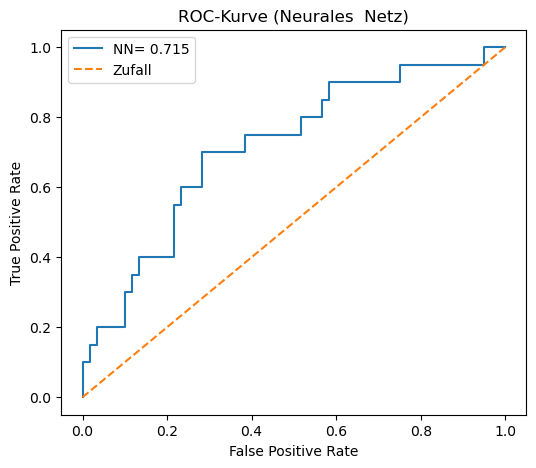

In [55]:
#Berechnet FPR;TPR thresholds
fpr_nn,  tpr_nn, thresholds_nn = roc_curve(y_test, y_proba_nn)
# Es wird eine neue Grafik mit fester Größe erstellt
plt.figure(figsize=(6, 5))
# Es wird die ROC-Kurve des neuralen Netzes gezeichnet
plt.plot(fpr_nn, tpr_nn, label=f"NN= {auc_nn:.3f}")
# Diagonale Linie = Zufallsklassifikator 
plt.plot([0, 1], [0, 1], "--", label= "Zufall")
# Beschriftung der Grafik und Anzeige 
plt.title("ROC-Kurve (Neurales  Netz)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [57]:
# Die vorhergesagten Wahrscheinlichkeiten des neuronalen Netzes werden in klassen umgewandelt
y_pred_nn = (y_proba_nn >=0.5).astype(int)

In [58]:
from sklearn.metrics import  confusion_matrix

In [68]:
# Es wird die Confusion Matrix für das neuronale Netz erstellt
#Vergliecht wahre Labels(y_test) mit Vorhersagen (y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)
# Gibt die Matrix numerisch aus 
cm_nn

array([[59,  1],
       [17,  3]])

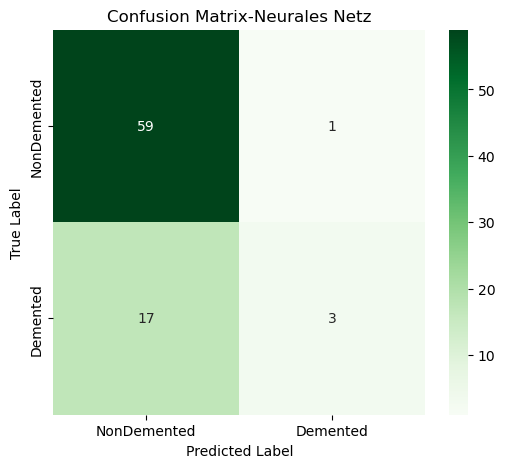

In [71]:
# Es wird eine neu Grafik für die Heatmap erstellt.
plt.figure(figsize=(6,5))
# annot =True Zahlen werden angezeiht, fmt = d ganze Zahlen, cmap= Greens für grüne Farbskala
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Greens", xticklabels = ["NonDemented", "Demented"], yticklabels= ["NonDemented", "Demented"])
# Beschriftung der Achsen und Titel
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix-Neurales Netz")
plt.show()

In [65]:
from sklearn.metrics import classification_report

# Es wird einen detaillierten Klassifikationsbericht ausgegeben
#y_test: die echten Klassen(Ground Truth)
# y_pred_nn die vom neuronalen Netz vorhergesagten  Klassen
# target_names: Name der Klassen füe eine bessere Lesbarkeit.

print(classification_report(
    y_test,
    y_pred_nn,
    target_names= ["NonDemented", "Demented"]
))

              precision    recall  f1-score   support

 NonDemented       0.78      0.98      0.87        60
    Demented       0.75      0.15      0.25        20

    accuracy                           0.78        80
   macro avg       0.76      0.57      0.56        80
weighted avg       0.77      0.78      0.71        80



In [72]:
tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()
print("Neural Network- True Negatives:", tn_nn)
print("Neural Network- True Negatives:", fp_nn)
print("Neural Network- True Negatives:", fn_nn)
print("Neural Network- True Negatives:", tp_nn)

Neural Network- True Negatives: 59
Neural Network- True Negatives: 1
Neural Network- True Negatives: 17
Neural Network- True Negatives: 3
